In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("D:/DataSets/diabetes.csv")

In [4]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [5]:
df.head()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols=cols[0:8]
feature_cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age']

In [7]:
X = df[feature_cols] # Features
y = df.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [9]:
# Train Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating a Classification Model
#### Basic terminology

###### True Positives (TP): we correctly predicted that they do have diabetes
###### True Negatives (TN): we correctly predicted that they don't have diabetes
###### False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
###### False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [10]:
# calculate accuracy
from sklearn import metrics

In [11]:
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[124  22]
 [ 31  54]]


In [12]:
#[row, column]
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

## Metrics computed from a confusion matrix¶
##### Classification Accuracy: Overall, how often is the classifier correct? (TP + TN) / float(TP + TN + FP + FN)
##### Sensitivity (Recall): When the actual value is positive, how often is the prediction correct? TP / float(FN + TP)
##### Specificity: When the actual value is negative, how often is the prediction correct? TN / (TN + FP)
##### Precision: When a positive value is predicted, how often is the prediction correct? TP / float(TP + FP)
##### Classification Error (Misclassification Rate): Overall, how often is the classifier incorrect? (FP + FN) / float(TP + TN + FP + FN)
##### False Positive Rate: When the actual value is negative, how often is the prediction incorrect? FP / float(TN + FP)

In [38]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t",metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t",metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t",metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:",1 - TN / (TN + FP))
    print('###########################################')

In [39]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7705627705627706
Sensitivity:	 0.6352941176470588
Specificity:	 0.8493150684931506
Precision:	 0.7105263157894737
Classification Eerror: 0.22943722943722944
False_Positive_Rate: 0.15068493150684936
###########################################


## Regression accuracy metrics

In [48]:
y = pd.DataFrame({'Original': y_test,'Predicted': y_pred})
y.head()

,Original,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


In [49]:
y.tail()

,Original,Predicted
241,0,0
599,0,0
650,0,0
11,1,1
214,1,0


## Evaluation indicators:

### MAE (Mean absolute error) 
#### represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
### MSE (Mean Squared Error) 
#### represents the difference between the original and predicted values extracted by squared the average difference over the data set.
### RMSE (Root Mean Squared Error) 
#### is the error rate by the square root of MSE.
### R-squared (Coefficient of determination) 
#### represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [36]:
def EvIndicator():
    print('Evaluation indicators')
    print("MAE:\t", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:\t", metrics.mean_squared_error(y_test, y_pred))
    print("RMSE:\t",  mse**(0.5))
    print("R-Squared:", metrics.r2_score(y_test, y_pred))
    print('###########################################')

In [37]:
EvIndicator()

Evaluation indicators
MAE:	 0.22943722943722944
MSE:	 0.22943722943722944
RMSE:	 0.4789960641145493
R-Squared: 0.013456889605157452
###########################################


## ===============================================================

## Publish

## ===============================================================

In [14]:
def plt1():
    import seaborn as sns; sns.set()
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True)

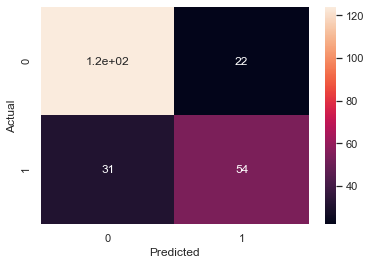

In [15]:
plt1()

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [17]:
def plt2():
    imgFile = 'DecTree.png'
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names = feature_cols, class_names=['0','1'])
    import matplotlib.image as mpimg 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(imgFile)
    Image(graph.create_png())
    img = mpimg.imread(imgFile)
    import matplotlib.pyplot as plt
    plt.figure(figsize = (20,6))
    plt.imshow(img)

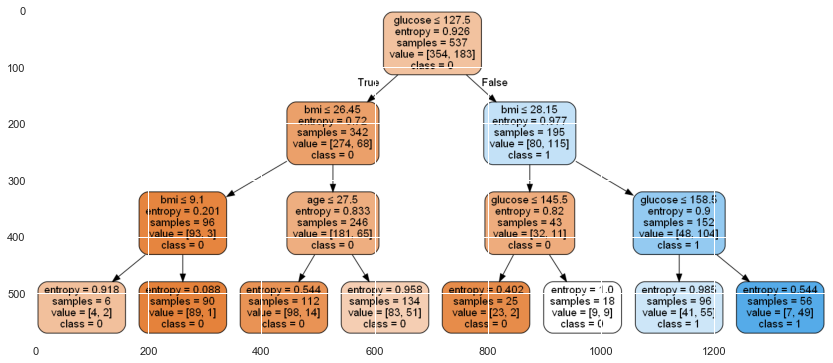

In [18]:
plt2()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\anvil\server.py", line 306, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\anvil\server.py", line 298, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\ProgramData\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 403, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\anvil\server.py", l

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


<ipython-input-17-f0eacb2decaa>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,6))


KeyboardInterrupt: 

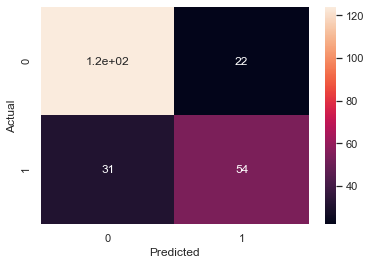

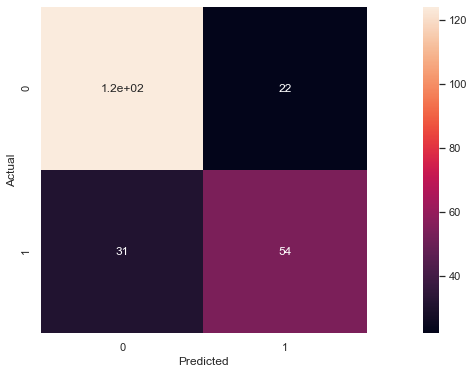

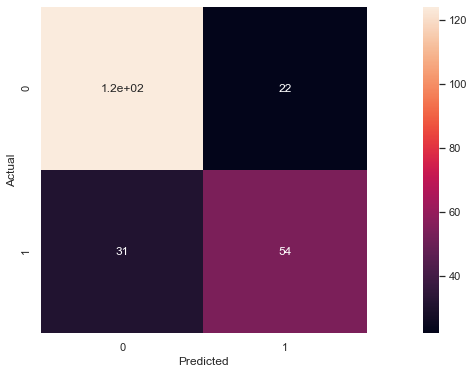

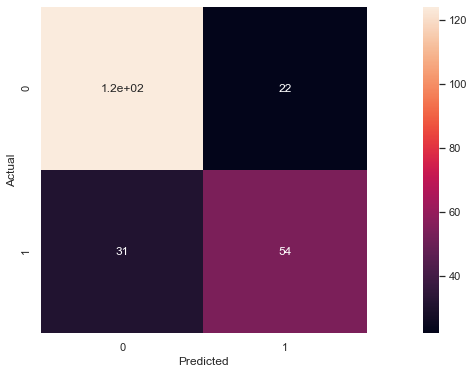

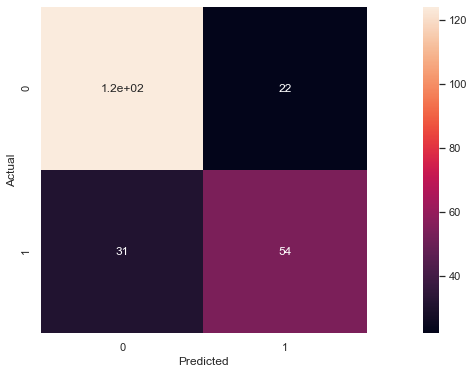

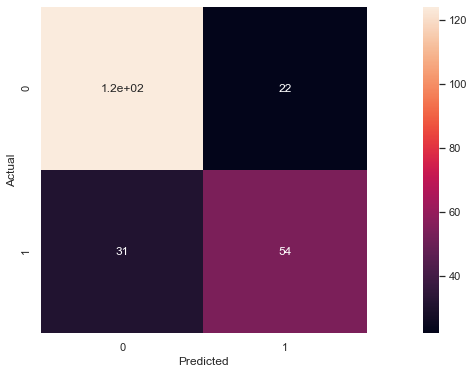

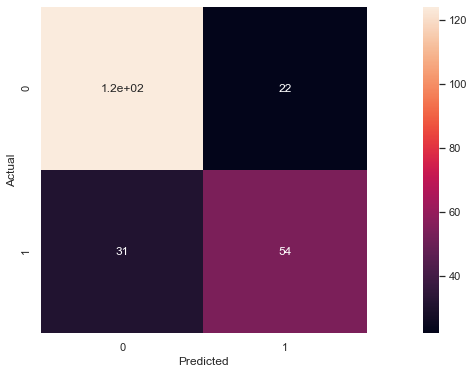

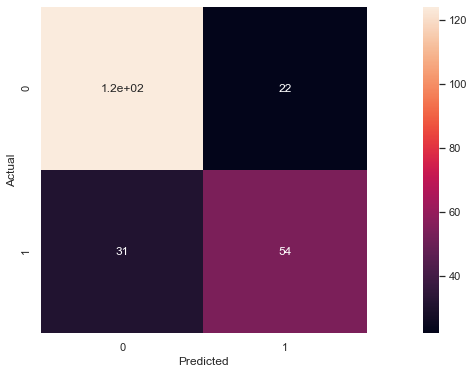

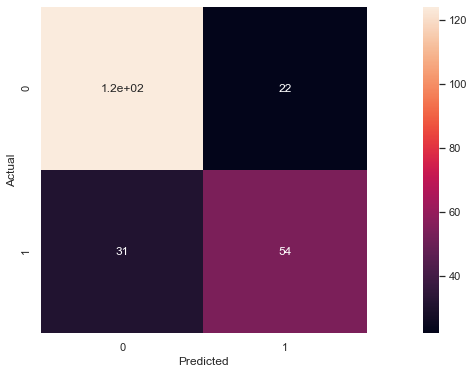

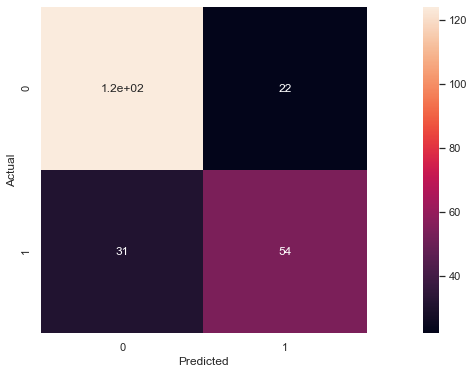

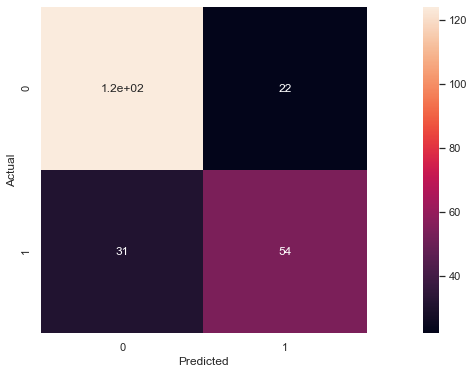

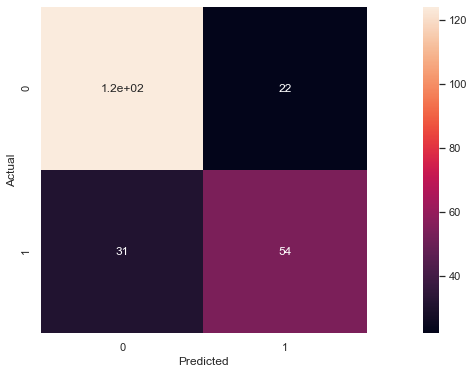

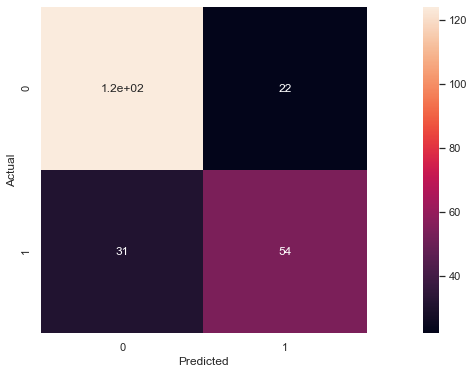

Error in callback <function flush_figures at 0x000001CCB020C1F0> (for post_execute):


KeyboardInterrupt: 

In [19]:
import anvil.server
import anvil.mpl_util
anvil.server.connect('M2XJQLL46X66WQ6YT44PLVZD-RREBIEBODR3TFLEX')

def m_plot1(): 
    plt1()
    return anvil.mpl_util.plot_image()

def m_plot2():
    plt2()    
    return anvil.mpl_util.plot_image()    

@anvil.server.callable

def getSrc():
    a = m_plot1()
    b = m_plot2()
    return [a,b]

anvil.server.wait_forever()